(4,9,3), 70.04125, 73.4375, 72.125
(3,8,3), 79.300625, 82.0625, 82.375
(2,6,3), 87.49625, 91.9375, 91.18
(0,3,3), 90.8825, 95.5, 93.68
(1,4,3), 96.904375, 98.3125, 98.25
(0,1,3), 95.64375, 98.625, 98.68
(4,9,4), 73.813125, 80.625, 79.06
(3,8,4), 83.745625, 87.25, 87.5
(2,6,4), 87.073125, 91.3125, 89.68
(0,3,4), 90.21125, 95.5625, 93.06
(1,4,4), 97.04125, 98.75, 98.62
(0,1,4), 95.146875, 98.5625, 98.56
(4,9,5), 74.3825, 80.9375, 78.87
(3,8,5), 82.483125, 86.875, 85.12
(2,6,5), 86.685, 92.5625, 90.37
(0,3,5), 88.695625, 95.5, 91.68
(1,4,5), 95.899375, 99.1875, 98.37
(0,1,5), 95.645625, 98.6875, 98.37


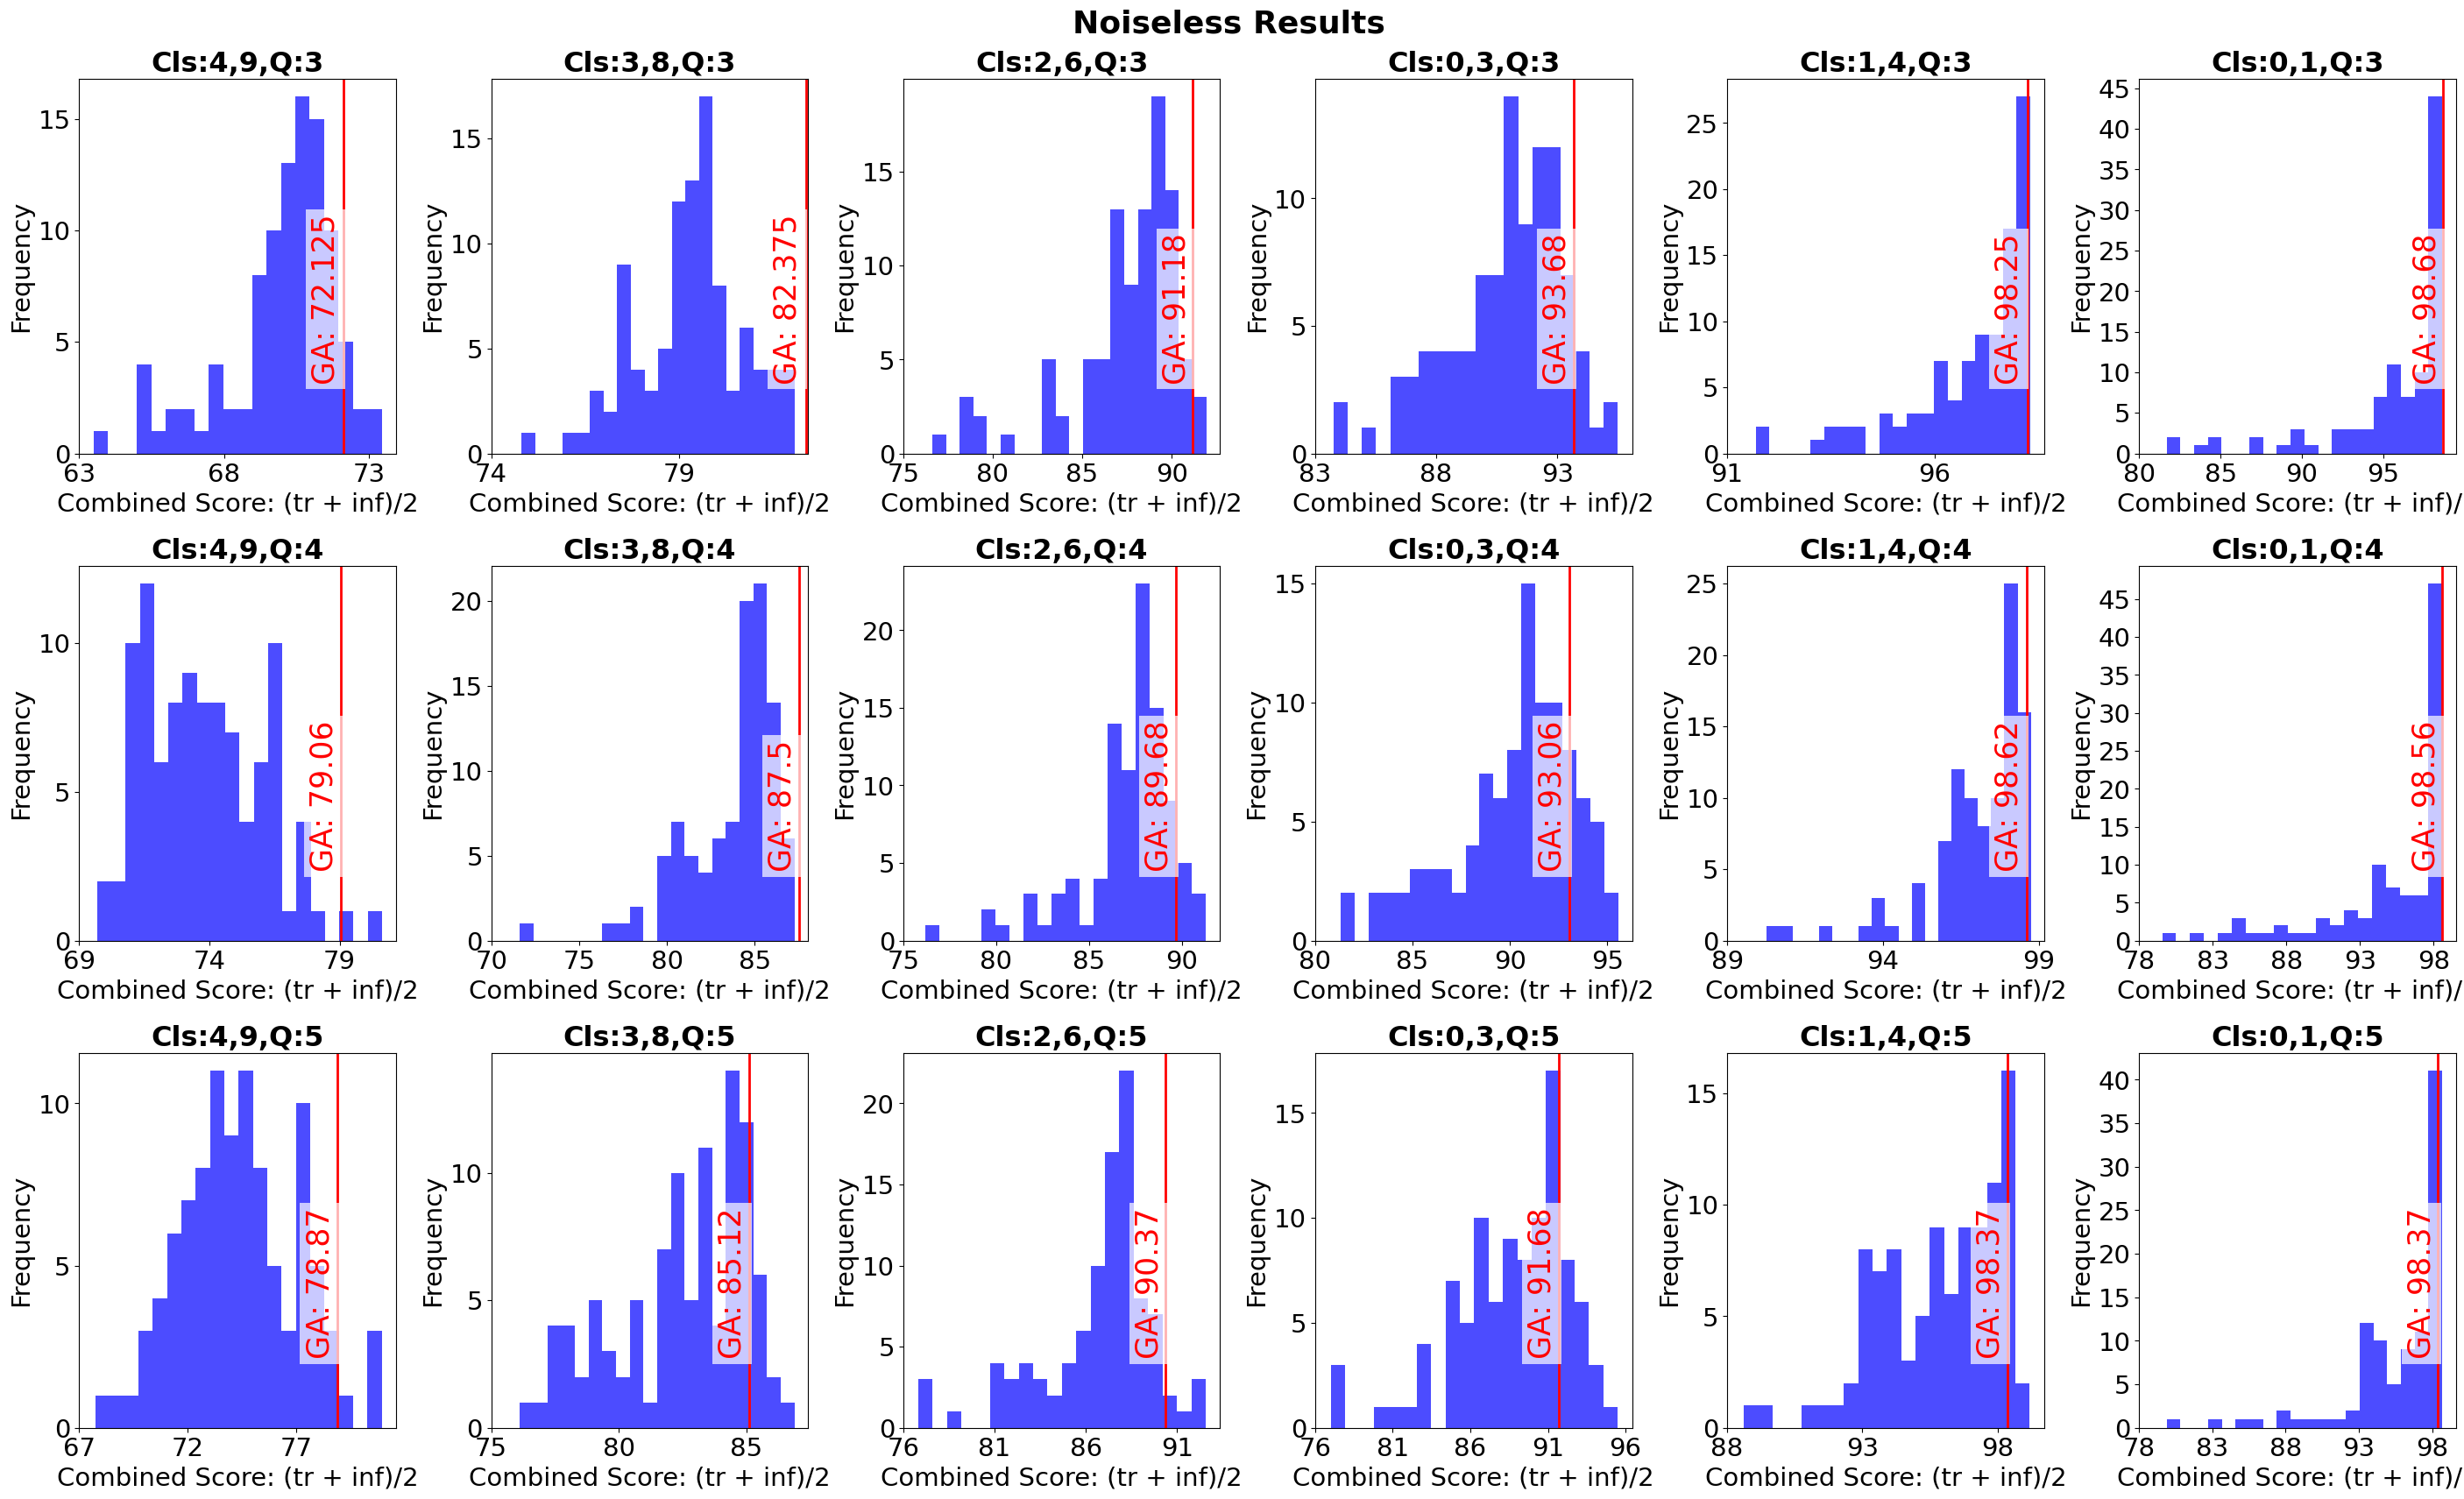

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ga_vals = [72.125, 82.375, 91.18, 93.68, 98.25, 98.68, 79.06, 87.5, 89.68, 93.06, 98.62, 98.56, 78.87, 85.12, 90.37, 91.68, 98.37, 98.37]
ga_dict = {(4,9,3):72.125, (3,8,3):82.375, (2,6,3):91.18, (0,3,3):93.68, (1,4,3):98.25, (0,1,3):98.68, (4,9,4):79.06, (3,8,4):87.5, (2,6,4):89.68, (0,3,4):93.06, (1,4,4):98.62, (0,1,4):98.56, (4,9,5):78.87, (3,8,5):85.12, (2,6,5):90.37, (0,3,5):91.68, (1,4,5):98.37, (0,1,5):98.37}

cls1 = [4, 3, 2, 0, 1, 0, 4, 3, 2, 0, 1, 0, 4, 3, 2, 0, 1, 0]
cls2 = [9, 8, 6, 3, 4, 1, 9, 8, 6, 3, 4, 1, 9, 8, 6, 3, 4, 1]
n_qubits = [3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5]

plt.figure(figsize = (35, 20))
plt.suptitle('Noiseless Results', fontsize=26, y=0.92, fontweight='bold')

for i in range(len(cls1)):
    with open(f'{n_qubits[i]}q_results/random_perms_{cls1[i]}_{cls2[i]}.txt', 'r') as f:
        lines = f.readlines()

    training_accuracies = list(map(float, lines[0].strip().split(",")))
    inferencing_accuracies = list(map(float, lines[1].strip().split(",")))
    combined_scores = [(t+i)/2 for t,i in zip(training_accuracies, inferencing_accuracies)]
    print(f'({cls1[i]},{cls2[i]},{n_qubits[i]}), {np.mean(combined_scores)}, {max(combined_scores)}, {ga_dict[(cls1[i], cls2[i], n_qubits[i])]}')

    plt.subplot(3, 6, i+1)
    ax = plt.gca()
    plt.hist(combined_scores, bins=20, color='b', alpha=0.7)
    plt.xlabel('Combined Score: (tr + inf)/2', fontsize=21)
    plt.ylabel('Frequency', fontsize=21)
    plt.xticks(fontsize=21)
    plt.yticks(fontsize=21)
    max_y = ax.get_ylim()[1]
    ax.set_yticks(range(0, int(max_y) + 1, 5))
    min_x = ax.get_xlim()[0]
    max_x = ax.get_xlim()[1]
    ax.set_xticks(range(int(min_x), int(max_x) + 1, 5))
    plt.title(f'Cls:{cls1[i]},{cls2[i]},Q:{n_qubits[i]}', fontsize=23, fontweight='bold')
    ga_value = ga_dict[(cls1[i], cls2[i], n_qubits[i])]
    plt.axvline(x=ga_dict[(cls1[i], cls2[i], n_qubits[i])], color='r', linewidth=2, label=f'GA: {ga_dict[(cls1[i], cls2[i], n_qubits[i])]}')
    plt.text(ga_value - 0.1, plt.ylim()[1] * 0.2, f'GA: {ga_value}', color='r', ha='right', rotation=90, fontsize=25, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.savefig('noiseless_results_MNIST_GA.pdf', format='pdf', bbox_inches='tight', dpi=600)




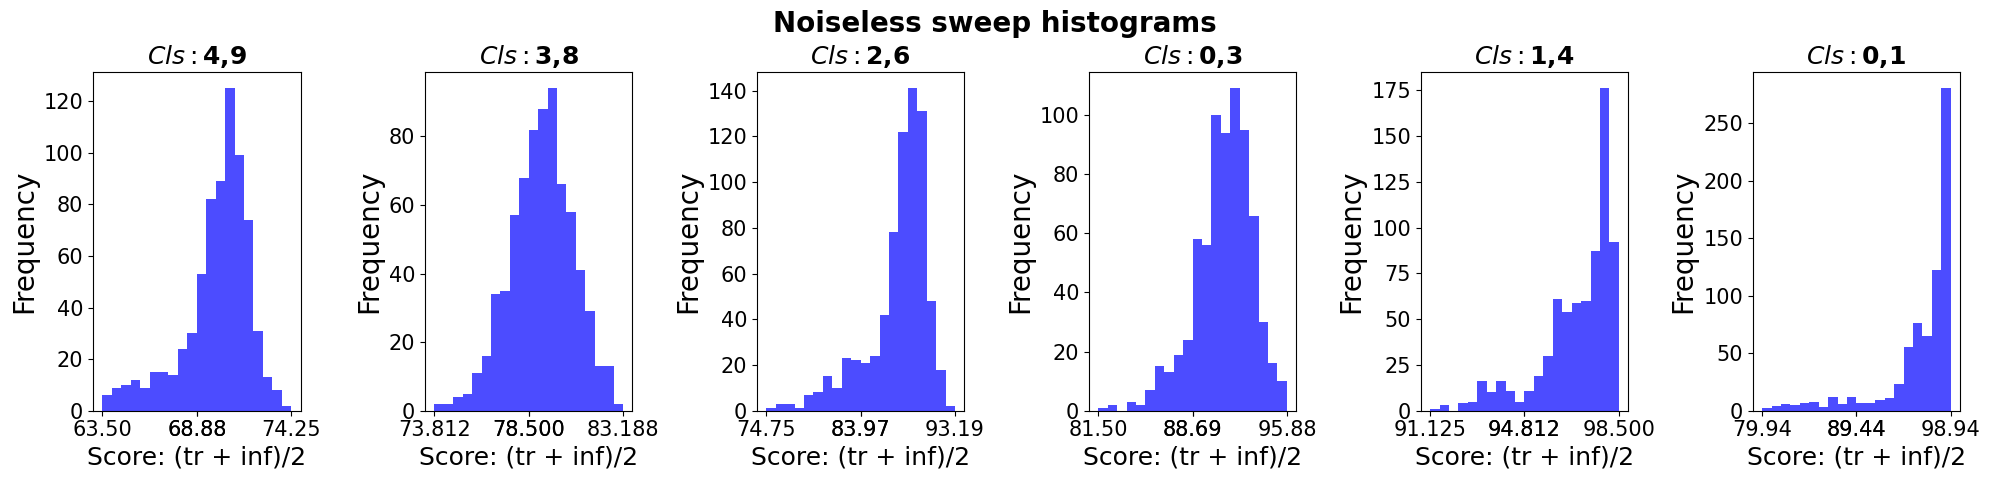

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

cls1 = [4, 3, 2, 0, 1, 0]
cls2 = [9, 8, 6, 3, 4, 1]
features = 6
indices = list(range(features))
all_perms = list(itertools.permutations(indices))

fig, axes = plt.subplots(1, 6, figsize=(20, 5))
plt.suptitle('Noiseless sweep histograms', fontsize=20, y=0.95, fontweight='bold') 

for i in range(len(cls1)):
    with open(f'3q_results/brute_force_{cls1[i]}_{cls2[i]}.txt', 'r') as f:
        lines = f.readlines()
    
    training_accuracies = list(map(float, lines[0].strip().split(",")))
    inferencing_accuracies = list(map(float, lines[1].strip().split(",")))
    combined_scores = [(t+i)/2 for t,i in zip(training_accuracies, inferencing_accuracies)]

    ax = axes[i]
    ax.hist(combined_scores, bins=20, color='b', alpha=0.7)
    ax.set_xlabel('Score: (tr + inf)/2', fontsize=18)
    ax.set_ylabel('Frequency', fontsize=20)
    x_min, x_max = min(combined_scores), max(combined_scores)
    x_ticks = np.linspace(x_min, x_min + (x_max - x_min) * 0.5, 2) 
    end_ticks = np.linspace(x_min + (x_max - x_min) * 0.5, x_max, 2)
    custom_x_ticks = np.concatenate([x_ticks, end_ticks])
    ax.set_xticks(custom_x_ticks)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_title(r'$\mathit{Cls:}$'+ r'$\mathbf{' + f'{cls1[i]}' + r'}$' + ',' + r'$\mathbf{' + f'{cls2[i]}' + r'}$', fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0,0,1,1])
plt.savefig('MNIST_brute_force_sweep_noiseless.pdf', dpi=600, format='pdf', bbox_inches='tight')
plt.show()

    

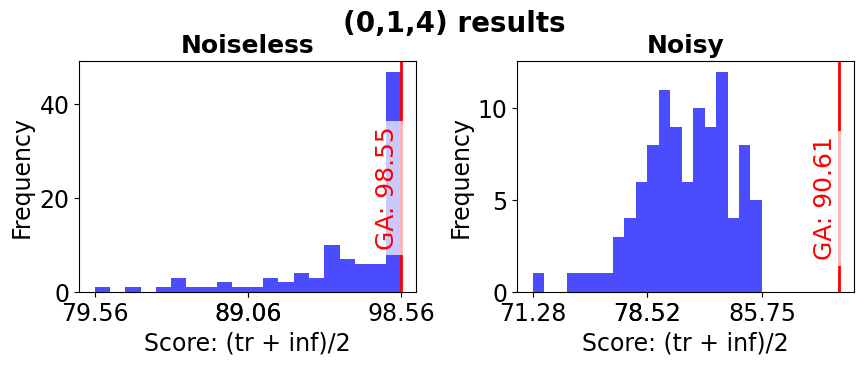

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

file_names = ['4q_results/random_perms_0_1.txt', '4q_results/random_perms_0_1_noisy_copy.txt']
ga_vals = [98.55, 90.61]
titles = ['Noiseless', 'Noisy']
text_heights = [10,2]

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
plt.suptitle('(0,1,4) results', fontsize=20, y=1.05, fontweight='bold')

for i in range(len(file_names)):
    with open(file_names[i], 'r') as f:
        lines = f.readlines()
    
    training_accuracies = list(map(float, lines[0].strip().split(",")))
    inferencing_accuracies = list(map(float, lines[1].strip().split(",")))
    combined_scores = [(t+i)/2 for t,i in zip(training_accuracies, inferencing_accuracies)]

    ax = axes[i]
    ax.hist(combined_scores, bins=20, color='b', alpha=0.7)
    ax.set_xlabel('Score: (tr + inf)/2', fontsize=17)
    ax.set_ylabel('Frequency', fontsize=17)
    x_min, x_max = min(combined_scores), max(combined_scores)
    x_ticks = np.linspace(x_min, x_min + (x_max - x_min) * 0.5, 2) 
    end_ticks = np.linspace(x_min + (x_max - x_min) * 0.5, x_max, 2)
    custom_x_ticks = np.concatenate([x_ticks, end_ticks])
    ax.set_xticks(custom_x_ticks)
    ax.tick_params(axis='both', which='major', labelsize=17)
    ax.axvline(x=ga_vals[i], color='r', linewidth=2, label=f'GA: {ga_vals[i]}')
    ax.text(ga_vals[i] - 0.1, text_heights[i], f'GA: {ga_vals[i]}', color='r', ha='right', rotation=90, fontsize=18, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
    ax.set_title(f'{titles[i]}', fontsize=18, fontweight='bold')
    plt.subplots_adjust(wspace=0.3)
    

plt.savefig('0_1_4_results.pdf', dpi=600, format='pdf', bbox_inches='tight')